In [1]:
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np
import math

In [2]:
#ESERCIZIO 1

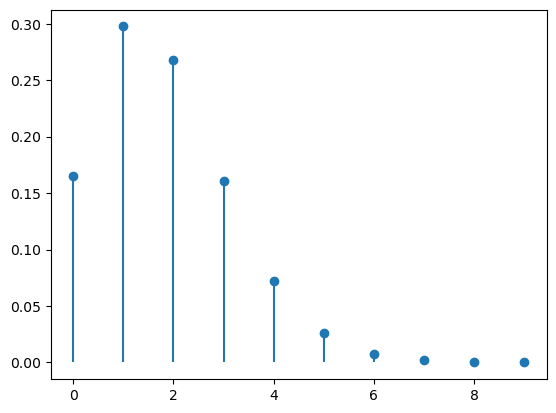

In [5]:
#1.4 Massa di probabilità di X (poissoniana) con lambda = 0.9
l = 0.9
Q = st.poisson(2*l)
x_max = Q.ppf(0.9999)
values = range(0, int(x_max) + 1) # aggiungo uno perché l'estremo superiore viene escluso dal range
plt.vlines(values, 0, Q.pmf(values)) # grafico a bastoncini perché lavoriamo con parametri naturali, quindi barre aventi spessore o linee poligonali potrebbero confondere l'osservatore, dando un senso di falsa continuità
plt.plot(values, Q.pmf(values), 'o')
plt.show()

In [6]:
#ESERCIZIO 2

In [25]:
rilevazioni = pd.read_csv('rilevazioni.csv',sep = ';', decimal = '.')
rilevazioni

,temperatura,blocchidanneggiati,raffreddamento
0,46.024489,0.0,1.0
1,83.225486,0.0,1.0
2,81.451565,0.0,NaN
3,54.427135,0.0,1.0
4,76.438674,0.0,1.0
...,...,...,...
1722,28.688900,5.0,0.0
1723,56.358840,5.0,0.0
1724,64.711851,6.0,0.0
1725,34.016859,6.0,0.0


In [8]:
#1.1 Scrivete del codice che dica

In [14]:
#1.1.1 Quanti casi sono contenuti nel dataset
print(len(rilevazioni))

#1.1.2 Quanti casi contengono almeno un valore mancante
print(len(rilevazioni) - len(rilevazioni.dropna()))

#1.1.3 Quali attributi contengono almeno un valore mancante
print(pd.isnull(rilevazioni).any())

1727
5
blocchidanneggiati    False
raffreddamento         True
dtype: bool


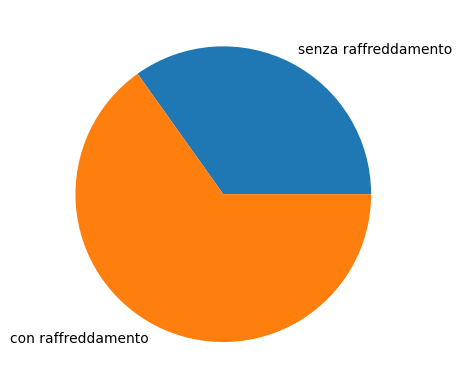

Uso un grafico a torta perchè l attributo è binario.


In [23]:
#1.2 Descrivere l'attributo raffreddamento usando la rappresentazione grafica più opportuna, giustificando.
raff_freq = rilevazioni['raffreddamento'].value_counts(normalize=True).sort_index()
plt.pie(raff_freq, labels=['senza raffreddamento', 'con raffreddamento'])
plt.show()
print('Uso un grafico a torta perchè l attributo è binario.')

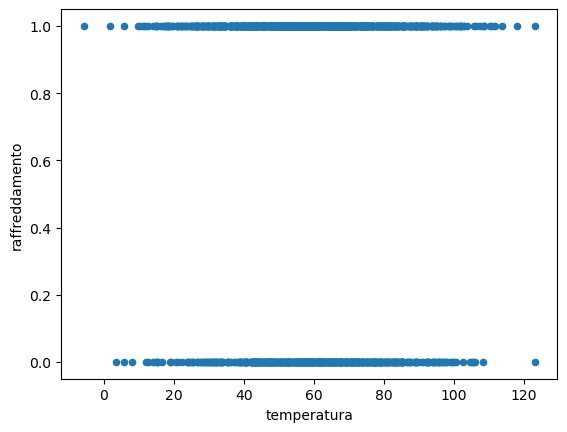

Usando uno scatter plot si nota come non esista alcun tipo di relazione tra la 
temperatura e l accensione del sistema di raffreddamento.
-0.046219473361162826
Indice di correlazione tra i due attributi tendente a 0 conferma tale ipotesi.


In [30]:
#1.3 Valutare l'ipotesi che la temperatura influisca sull'accensione del sistema di raffreddamento
rilevazioni.plot.scatter('temperatura','raffreddamento')
plt.show()
print('Usando uno scatter plot si nota come non esista alcun tipo di relazione tra la \ntemperatura e l accensione del sistema di raffreddamento.')
print(rilevazioni['temperatura'].corr(rilevazioni['raffreddamento']))
print('Indice di correlazione tra i due attributi tendente a 0 conferma tale ipotesi.')

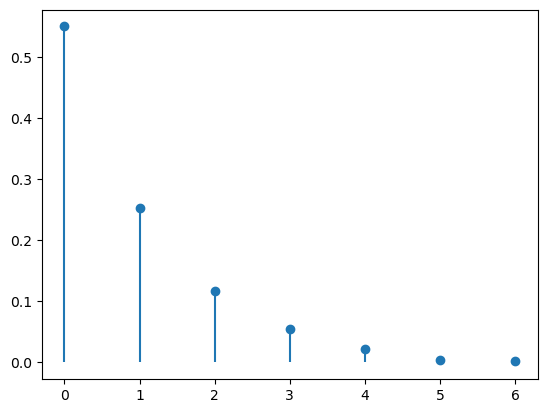

Usiamo un grafico a bastoncini perchè l attributo è discreto (o numerabile)


In [34]:
#1.4  Visualizzare graficamente l'attributo blocchidanneggiati, giustificando
blocchi_freq = rilevazioni['blocchidanneggiati'].value_counts(normalize=True).sort_index() 
plt.vlines(blocchi_freq.index, 0, blocchi_freq.values) 
plt.plot(blocchi_freq.index, blocchi_freq.values, 'o')
plt.show()
print('Usiamo un grafico a bastoncini perchè l attributo è discreto (o numerabile)')

In [38]:
'''
1.5 Generate una tabella che mostri le frequenze congiunte degli attributi blocchidanneggiati e raffreddamento. 
Indicando con R l'evento che si verifica quando il sistema di raffreddamento automatico è stato attivato durante 
un'ora e con D l'evento che si verifica quando in un'ora risultano danneggiati dei blocchi del disco fisso, usate 
la tabella generata per calcolare le seguenti probabilità: 
i.   P(D)
ii.  P(R unito D), 
iii. P(D|R), 
iv.  P(R|D complemento). 
Le probabilità che avete calcolato devono sommare a uno? Perché?
'''

blocchi_raff = pd.crosstab(index = rilevazioni['blocchidanneggiati'],
                          columns = rilevazioni['raffreddamento'],
                          margins = True)
blocchi_raff

raffreddamento,0.0,1.0,All
blocchidanneggiati,,,
0.0,116,830,946
1.0,181,253,434
2.0,166,34,200
3.0,89,5,94
4.0,37,0,37
5.0,8,0,8
6.0,3,0,3
All,600,1122,1722


In [45]:
print('P(D) =', (1722 - 946)/1722)
print('P(R unito D) =', ((1122-830)/(1722-946)) * ((1722 - 946)/1722))
print('P(D|R) =', (1122-830)/(1122))
print('P(R|D complemento) =',830/946)

P(D) = 0.45063879210220675
P(R unito D) = 0.16957026713124274
P(D|R) = 0.26024955436720143
P(R|D complemento) = 0.8773784355179705


In [46]:
#ESERCIZIO 4
#Concentriamoci su blocchidanneggiati

In [81]:
#4.1 Memorizzare in raffreddamento_si e raffreddamento_no i valori di blocchidanneggiati nei due casi di raffreddamento
raffreddamento_si = rilevazioni[rilevazioni['raffreddamento'] == 1]['blocchidanneggiati']
raffreddamento_no = rilevazioni[rilevazioni['raffreddamento'] == 0]['blocchidanneggiati']
raffreddamento_si

0       0.0
1       0.0
3       0.0
4       0.0
5       0.0
       ... 
1120    3.0
1121    3.0
1122    3.0
1123    3.0
1124    3.0
Name: blocchidanneggiati, Length: 1122, dtype: float64

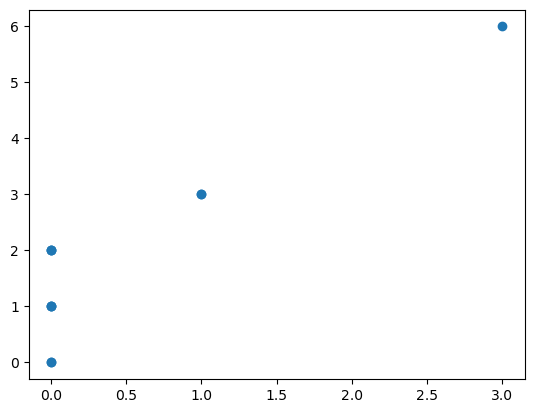

In [64]:
'''
4.2 Calcolate i decili empirici (i quantili di livello uguale a i/10 per i = 0,...,10) separatamente per i dati 
contenuti in `raffreddamento_si` e `raffreddamento_no` e disegnate i punti le cui ascisse e ordinate corrispondono, 
rispettivamente, ai valori ottenuti, raggruppati per livello. Usate il grafico ottenuto per confermare o confutare 
l'ipotesi che la distribuzione del numero di blocchi danneggiati sia dipendente dal funzionamento del sistema di 
raffreddamento automatico, motivando il vostro ragionamento. Integrate la vostra analisi con altri metodi che 
ritenete opportuni.
'''

decili = [i/10 for i in range(0,11)]
decili_raffsi = raffreddamento_si.quantile(decili)
decili_raffno = raffreddamento_no.quantile(decili)

plt.plot(decili_raffsi, decili_raffno, 'o')
plt.show()

In [65]:
'''
4.3 Supponendo che i valori di raff_si siano assimilabili ad un campione estratto da una popolazione 
descritta da Xsi, stimarne il valore atteso
'''
raffreddamento_si.mean()

0.2994652406417112

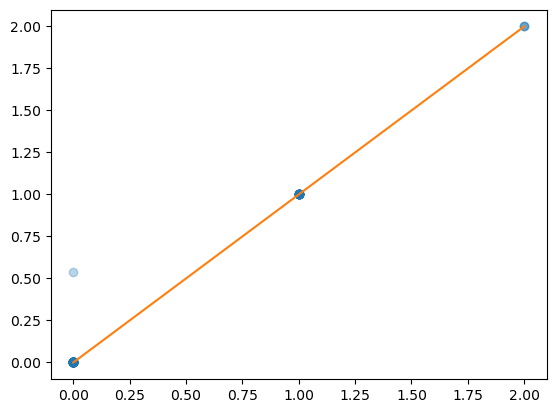

Come si vede dal grafico, i punti si distribuiscono sulla bisettrice, il che conferma l ipotesi.
0.2994652406417112 0.29739489664976254
Inoltre i valori molto simili di valore atteso e varianza rafforzano ulteriormente questa ipotesi.


In [68]:
#4.4 Confermare che i valori di raffreddamento_si siano descritti da una distribuzione di Poisson
X = st.poisson(raffreddamento_si.mean())
quantili = np.arange(0.01, 1.01, 0.01)
plt.plot(X.ppf(quantili), raffreddamento_si.quantile(quantili), 'o', alpha=0.3) 
plt.plot([0, 2], [0, 2])
plt.show()
print('Come si vede dal grafico, i punti si distribuiscono sulla bisettrice, il che conferma l ipotesi.')
print(raffreddamento_si.mean(), raffreddamento_si.var())
print('Inoltre i valori molto simili di valore atteso e varianza rafforzano ulteriormente questa ipotesi.')

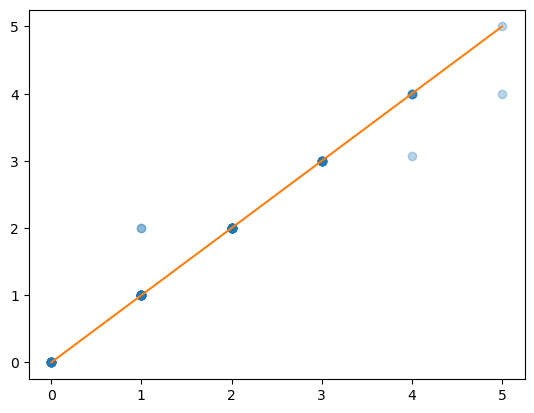

Come si vede dal grafico, i punti si distribuiscono sulla bisettrice, il che conferma l ipotesi.
1.6433333333333333 1.5453644963828614
Inoltre i valori molto simili di valore atteso e varianza rafforzano ulteriormente questa ipotesi.


In [70]:
#4.5 Ripetere le analisi fatte al punto precedente ma stavolta per raffreddamento_no
X = st.poisson(raffreddamento_no.mean())
quantili = np.arange(0.01, 1.01, 0.01)
plt.plot(X.ppf(quantili), raffreddamento_no.quantile(quantili), 'o', alpha=0.3) 
plt.plot([0, 5], [0, 5])
plt.show()
print('Come si vede dal grafico, i punti si distribuiscono sulla bisettrice, il che conferma l ipotesi.')
print(raffreddamento_no.mean(), raffreddamento_no.var())
print('Inoltre i valori molto simili di valore atteso e varianza rafforzano ulteriormente questa ipotesi.')

In [72]:
'''
4.6 Indicare se esiste uno stimatore non distorto per:
La varianza di Xsi
La deviazione standard di Xsi
Il parametro lambda_si
Di quali proprietà godono questi stimatori?
'''
print('Stimatore per la varianza di Xsi:', raffreddamento_si.var())  #Varianza campionaria
print('Stimatore per la deviazione standard di Xsi:', math.sqrt(raffreddamento_si.var()))  #Radice quadrata della var. camp.
print('Stimatore per il parametro lambda_si:', raffreddamento_si.mean())  #Valore atteso in un modello di Poisson = parametro
print('Il primo e il terzo stimatore sono non distorti e tutti e 3 sono consistenti in media quadratica.')

Stimatore per la varianza di Xsi: 0.29739489664976254
Stimatore per la deviazione standard di Xsi: 0.5453392491374177
Stimatore per il parametro lambda_si: 0.2994652406417112
Il primo e il terzo stimatore sono non distorti e tutti e 3 sono consistenti in media quadratica.


In [78]:
#4.7 Con quale probabilità potete garantire che la stima al punto 3 disti in valore assoluto dal valore sconosciuto più di 0.1?
Z = st.norm()
arg = (0.1/math.sqrt(raffreddamento_si.mean()))*math.sqrt(len(raffreddamento_si))
(1 - (2*Z.cdf(arg)-1)) 

9.298299907811725e-10

In [79]:
#4.8 Stima probabilità che il sistema di raffreddamento sia in funzione
len(raffreddamento_si) / len(rilevazioni)

0.6496815286624203

In [83]:
'''
4.9 Sostituendo a lambda_SI e lambda_NO delle opportune stime che potete ricavare dai dati a 
disposizione, calcolate la probabilità che in un'ora si danneggino più di quattro blocchi, considerando 
separatamente i due casi nei quali rispettivamente il sistema di raffreddamento è in funzione oppure no.
'''
Xsi = st.poisson(raffreddamento_si.mean())
Xno = st.poisson(raffreddamento_no.mean())
print('Per raffreddamento attivo:',1- Xsi.cdf(4))
print('Per raffreddamento NON attivo:',1- Xno.cdf(4))

Per raffreddamento attivo: 1.565177694551334e-05
Per raffreddamento NON attivo: 0.02614944042142986


In [84]:
'''
4.10 Se in un'ora di funzionamento si danneggiano più di quattro blocchi, il sistema di rilevazione genera 
un allarme. Qual è la probabilità che questo allarme venga generato?
'''
X = st.poisson(rilevazioni.blocchidanneggiati.mean())
1 - X.cdf(4)

0.0011760210899806056